# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [5]:
df = pd.read_csv("./chronic_kidney_disease.csv")
df.head(10)


,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
5,90.0,1.015,3.0,0.0,1.0,25.0,1.1,142.00,3.20,12.2,7800.0,4.40,1.0,1
6,70.0,1.010,0.0,0.0,1.0,54.0,24.0,104.00,4.00,12.4,8406.0,4.71,0.0,1
7,76.0,1.015,2.0,4.0,1.0,31.0,1.1,137.53,4.63,12.4,6900.0,5.00,0.0,1
8,100.0,1.015,3.0,0.0,1.0,60.0,1.9,137.53,4.63,10.8,9600.0,4.00,1.0,1
9,90.0,1.020,2.0,0.0,0.0,107.0,7.2,114.00,3.70,9.5,12100.0,3.70,1.0,1


In [4]:
df.tail(10)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
390,80.0,1.025,0.0,0.0,1.0,25.0,0.8,135.0,3.7,15.0,6300.0,5.3,0.0,0
391,80.0,1.025,0.0,0.0,1.0,16.0,1.1,142.0,4.1,15.6,5800.0,6.3,0.0,0
392,80.0,1.020,0.0,0.0,1.0,48.0,1.2,147.0,4.3,14.8,6600.0,5.5,0.0,0
393,60.0,1.025,0.0,0.0,1.0,45.0,0.7,141.0,4.4,13.0,7400.0,5.4,0.0,0
394,80.0,1.020,0.0,0.0,1.0,46.0,0.8,139.0,5.0,14.1,9500.0,4.6,0.0,0
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.0,4.9,15.7,6700.0,4.9,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.0,3.5,16.5,7800.0,6.2,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.0,4.4,15.8,6600.0,5.4,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.0,4.9,14.2,7200.0,5.9,0.0,0
399,80.0,1.025,0.0,0.0,1.0,18.0,1.1,141.0,3.5,15.8,6800.0,6.1,0.0,0


# Dataset info

In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


# List of cols

In [7]:
columns_list = df.columns.tolist()
print(columns_list)

['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc', 'Htn', 'Class']


# Null check

In [8]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [ ]:
# if null existed
df.fillna(df.mean(), inplace=True)

# Charts

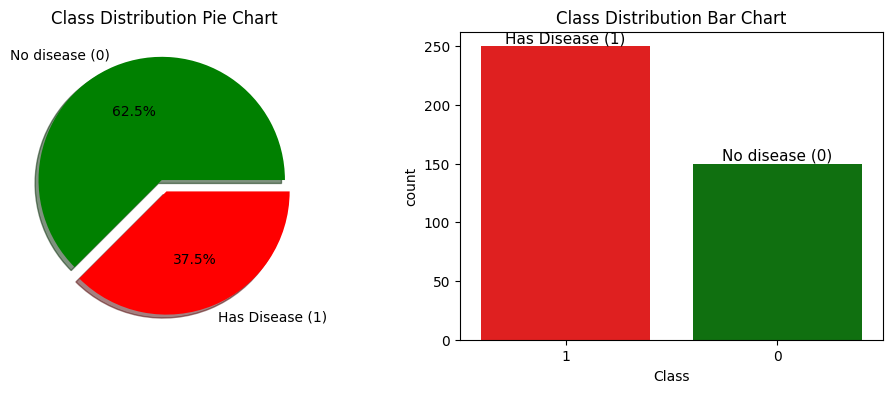

In [9]:
class_colors = ['green', 'red']  
class_order = ["No disease (0)", "Has Disease (1)"]  

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

#  pie chart for Class distribution
df['Class'].value_counts().plot(kind="pie", 
                                labels=class_order, 
                                colors=class_colors, 
                                explode=[0.05, 0.05], 
                                autopct='%1.1f%%', 
                                ax=ax[0], 
                                shadow=True)
ax[0].set_title("Class Distribution Pie Chart")
ax[0].set_ylabel('')



 #  bar chart for Class distribution
new_labels = ["No disease (0)", "Has Disease (1)"]

count = sns.countplot(x="Class", data=df, ax=ax[1], order=[1, 0], hue="Class", legend=False, palette=class_colors)


for i, bar in enumerate(count.patches):
    count.annotate(new_labels[i], 
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=11, xytext=(0, 6),
                   textcoords='offset points')

# title and show the plot
ax[1].set_title("Class Distribution Bar Chart")
plt.show()



# Imports

In [10]:
from sklearn.model_selection import train_test_split as split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Split Dataset

In [11]:
x = df.drop("Class", axis=1)
y = df.Class

x_train, x_test, y_train, y_test = split(x, y, test_size=0.20, random_state=1)

print(f"Original data has total {x_train.shape[0]+x_test.shape[0]} datas, {x_train.shape[0]} train data and {x_test.shape[0]} test data\n")


Original data has total 400 datas, 320 train data and 80 test data



# Models

In [12]:
# Decision tree
rf_decision_tree = DecisionTreeClassifier(random_state=50)
rf_decision_tree.fit(x_train, y_train)
y_pred = rf_decision_tree.predict(x_test)
print(f"Decision Tree Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")


# Random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_random_forest = RandomForestClassifier(random_state=50)
rf_random_forest.fit(x_train, y_train)
y_pred = rf_random_forest.predict(x_test)
print(f"Random Forest Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")


# SVM
rf_svm = SVC(random_state=50)
rf_svm.fit(x_train, y_train)
y_pred = rf_svm.predict(x_test)
print(f"SVM Dataset Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Decision Tree Test Accuracy: 95.0%
Random Forest Test Accuracy: 100.0%
SVM Dataset Accuracy: 58.75%


# Reports of models

In [13]:
from sklearn.metrics import classification_report

print("Decision tree report")
print(classification_report(y_test, rf_decision_tree.predict(x_test),zero_division=1))
print()
print("Random forest report")
print(classification_report(y_test, rf_random_forest.predict(x_test),zero_division=1))
print()
print("SVM report")
print(classification_report(y_test, rf_svm.predict(x_test),zero_division=1))

Decision tree report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.96      0.96      0.96        47

    accuracy                           0.95        80
   macro avg       0.95      0.95      0.95        80
weighted avg       0.95      0.95      0.95        80


Random forest report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80


SVM report
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        33
           1       0.59      1.00      0.74        47

    accuracy                           0.59        80
   macro avg       0.79      0.50      0.37        80
weighted avg       

# Confusion matrix

Confusion matrix of decision tree


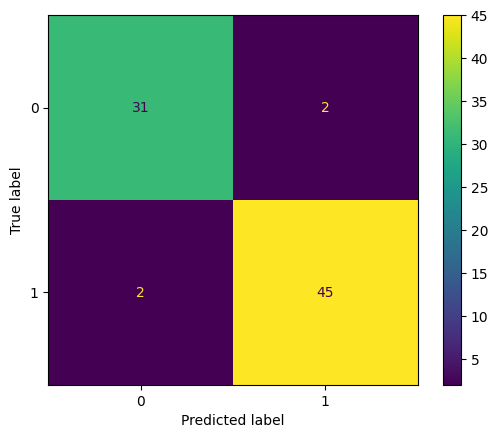

Confusion matrix of Random forest


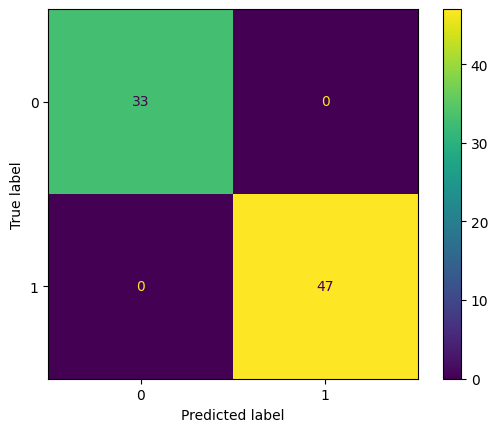

Confusion matrix of SVM


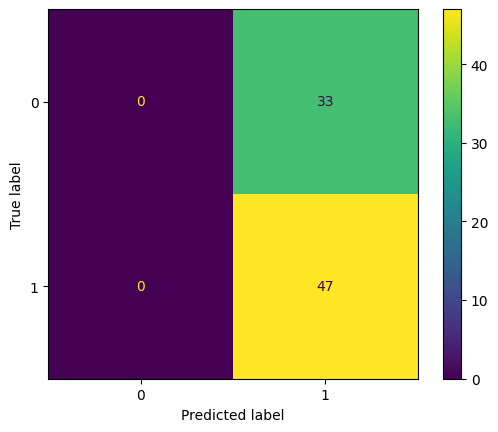

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Confusion matrix of decision tree")
y_pred = rf_decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_decision_tree.classes_)
disp.plot()
plt.show()



print("Confusion matrix of Random forest")
y_pred = rf_random_forest.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_random_forest.classes_)
disp.plot()
plt.show()



print("Confusion matrix of SVM")
y_pred = rf_svm.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

#  the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_svm.classes_)
disp.plot()
plt.show()

# outlier

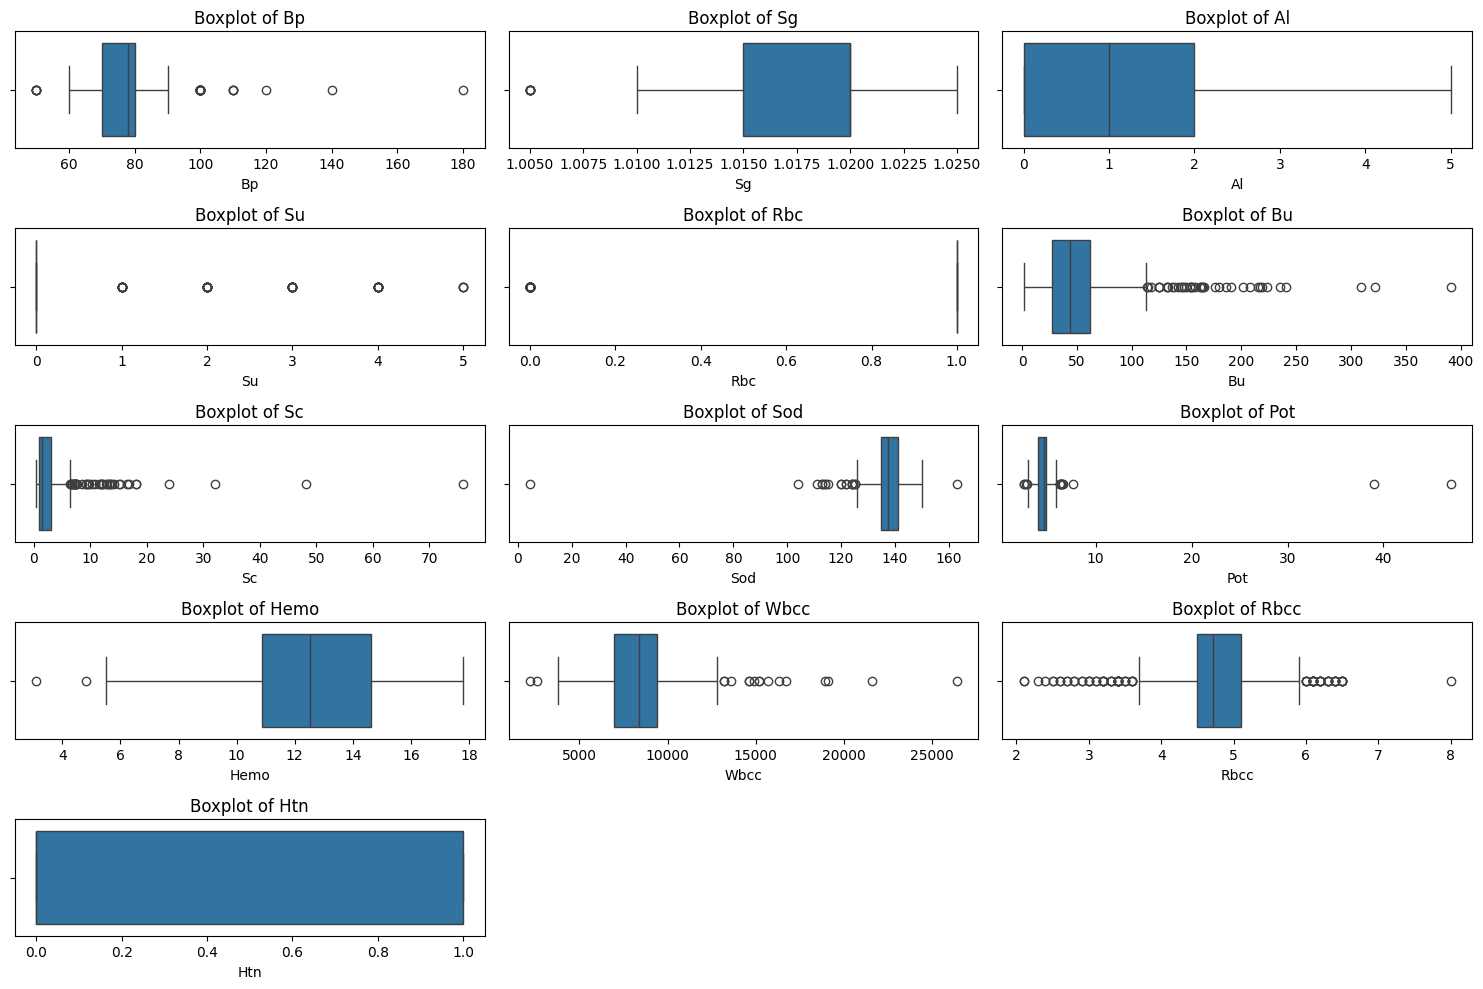

In [15]:

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(x.columns, 1):
    plt.subplot(len(x.columns) // 3 + 1, 3, i)  
    sns.boxplot(x=x[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# outlier col

In [16]:

# Define a function to detect outliers using the IQR method
def detect_outliers(df):
    outlier_columns = []
    for col in df.columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers in the column
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).any():
            outlier_columns.append(col)

    return outlier_columns

# Detect which columns in X have outliers
columns_with_outliers = detect_outliers(x)

print("Columns with outliers:", columns_with_outliers)



Columns with outliers: ['Bp', 'Sg', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc', 'Rbcc']


# outliers count

In [17]:

# Function to count outliers using IQR
def count_outliers(df):
    outlier_counts = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in the column
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        outlier_counts[col] = outliers

    # Convert the dictionary to a pandas DataFrame for better visualization
    outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])
    return outlier_counts_df.sort_values(by='Outlier Count', ascending=False)

# Get the outlier counts for each column
outlier_counts_df = count_outliers(x)

# Display the columns with the most outliers
print(outlier_counts_df)

   Column  Outlier Count
11   Rbcc             75
3      Su             61
4     Rbc             47
6      Sc             44
5      Bu             41
0      Bp             36
7     Sod             18
10   Wbcc             17
8     Pot             14
1      Sg              7
9    Hemo              2
2      Al              0
12    Htn              0


# Cap outliers

In [18]:
# Function to cap outliers
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Cap outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

# Cap outliers in X
x = cap_outliers(x, columns_with_outliers)


# Outlier after capping

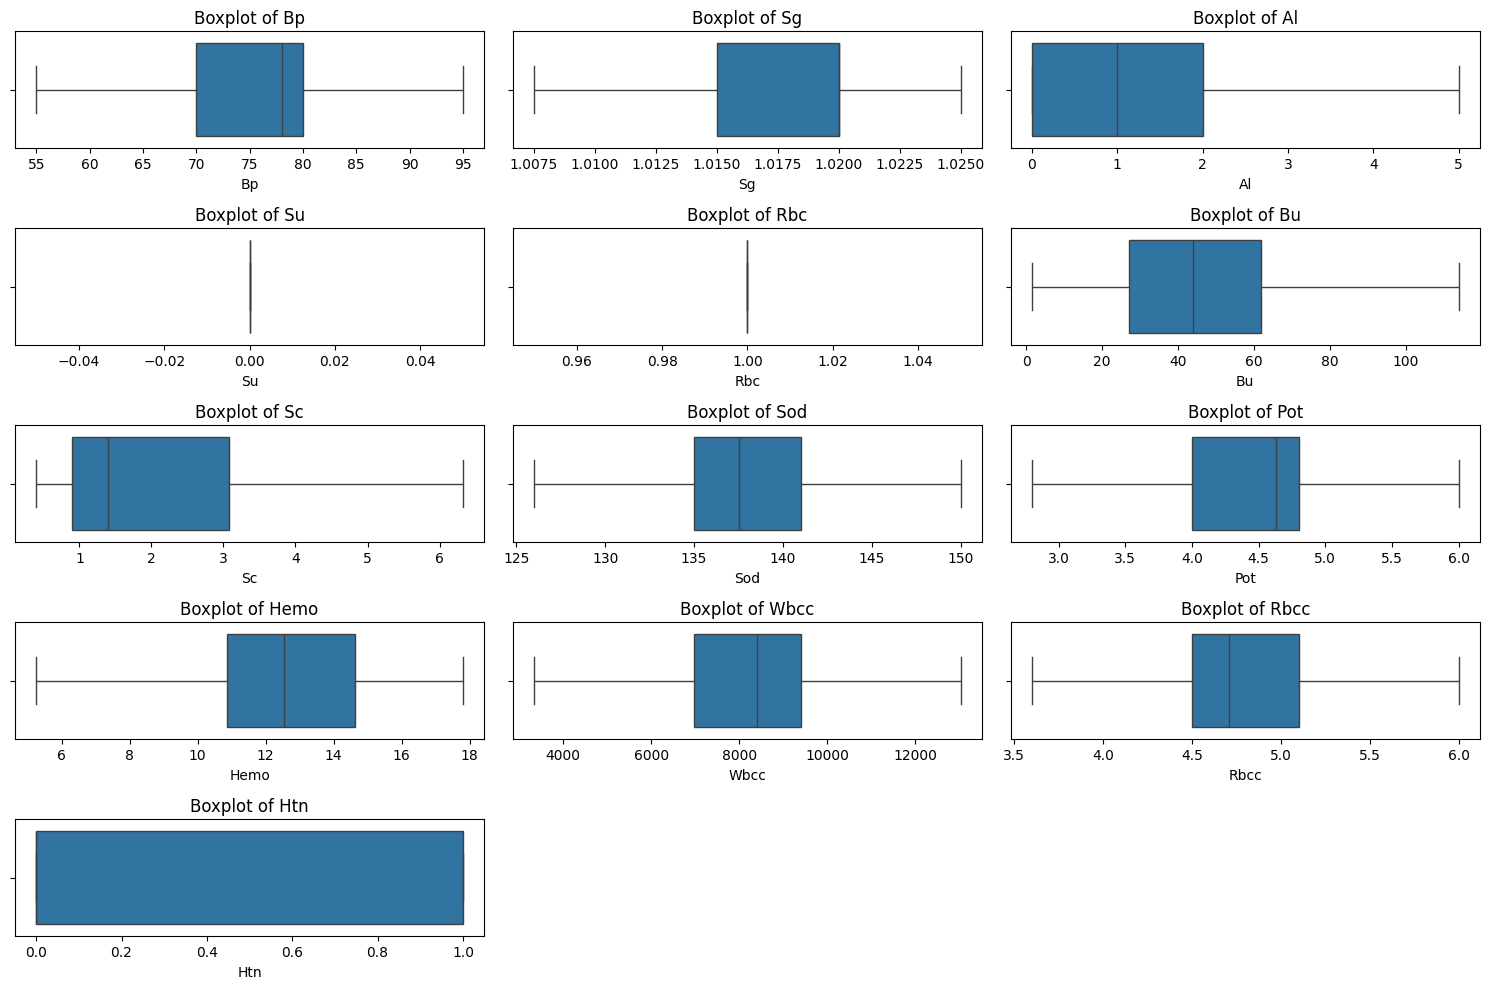

In [19]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Create boxplots for each feature
plt.figure(figsize=(15, 10))

# Loop through each column in the dataset except the target variable
for i, col in enumerate(x.columns, 1):
    plt.subplot(len(x.columns) // 3 + 1, 3, i)  # Create subplots dynamically
    sns.boxplot(x=x[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Smote

In [21]:
#default
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

# Apply SMOTE to the training data
smote = SMOTE(random_state=1)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)


In [27]:
from imblearn.over_sampling import RandomOverSampler

# Apply Random Oversampler to the training data
ros = RandomOverSampler(random_state=1)
x_train_smote, y_train_smote = ros.fit_resample(x_train, y_train)


In [28]:
from imblearn.combine import SMOTETomek

# Apply SMOTETomek to the training data
smote_tomek = SMOTETomek(random_state=1)
x_train_smote, y_train_smote = smote_tomek.fit_resample(x_train, y_train)


In [29]:
# Apply ADASYN to the training data
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=1)
x_train_smote, y_train_smote = adasyn.fit_resample(x_train, y_train)

# After Smote Charts

C:\Users\user\AppData\Local\Temp\ipykernel_7364\1695023553.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smote_class_order, y=smote_class_counts, palette=class_colors, ax=ax[1])


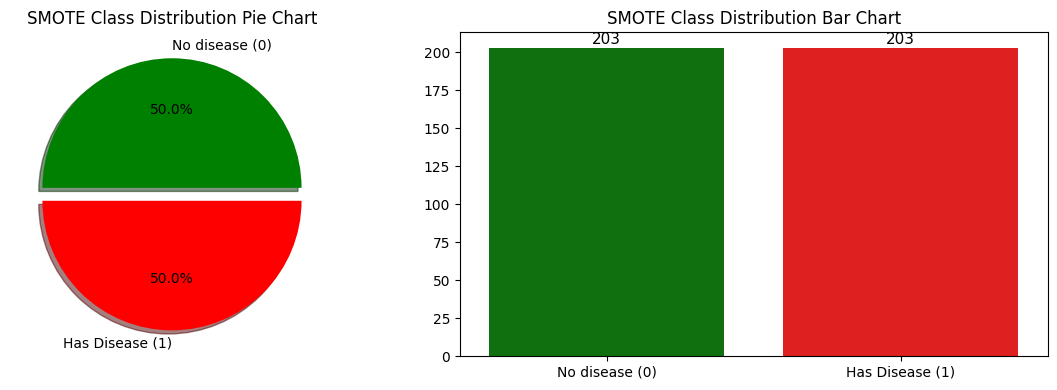

In [22]:
from collections import Counter

# Get the distribution of the resampled data
smote_counts = Counter(y_train_smote)

#  Prepare class data after SMOTE
smote_class_counts = [smote_counts[0], smote_counts[1]]
smote_class_order = ["No disease (0)", "Has Disease (1)"]

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Pie chart for SMOTE-applied Class distribution
ax[0].pie(smote_class_counts,
          labels=smote_class_order, 
          colors=class_colors, 
          explode=[0.05, 0.05], 
          autopct='%1.1f%%', 
          shadow=True)
ax[0].set_title("SMOTE Class Distribution Pie Chart")
ax[0].set_ylabel('')

# Bar chart for SMOTE-applied Class distribution
sns.barplot(x=smote_class_order, y=smote_class_counts, palette=class_colors, ax=ax[1])

for i, bar in enumerate(ax[1].patches):
    ax[1].annotate(f'{smote_class_counts[i]}', 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center', 
                   size=11, xytext=(0, 6), 
                   textcoords='offset points')

ax[1].set_title("SMOTE Class Distribution Bar Chart")

# Show the plot
plt.tight_layout()
plt.show()


# After smote accuracy reports

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.0


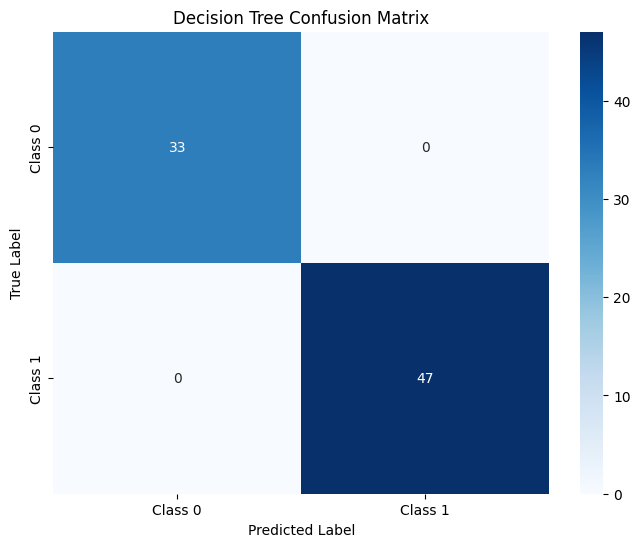


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        47

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Accuracy: 1.0


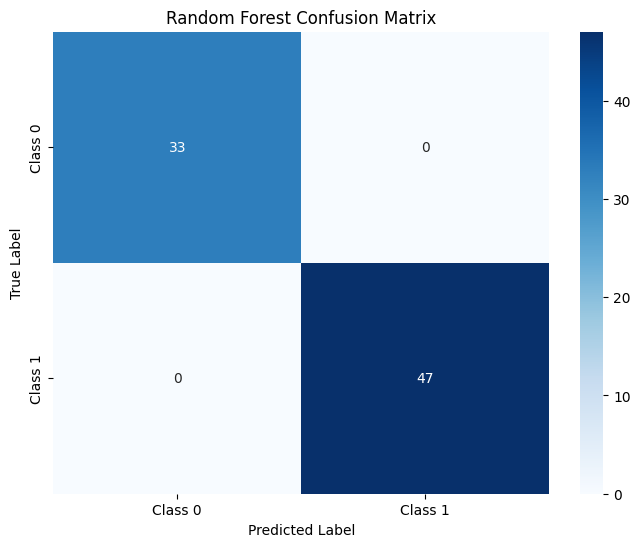


Support Vector Machine Classifier:
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        33
           1       0.73      0.68      0.70        47

    accuracy                           0.66        80
   macro avg       0.66      0.66      0.66        80
weighted avg       0.67      0.66      0.66        80

Accuracy: 0.6625


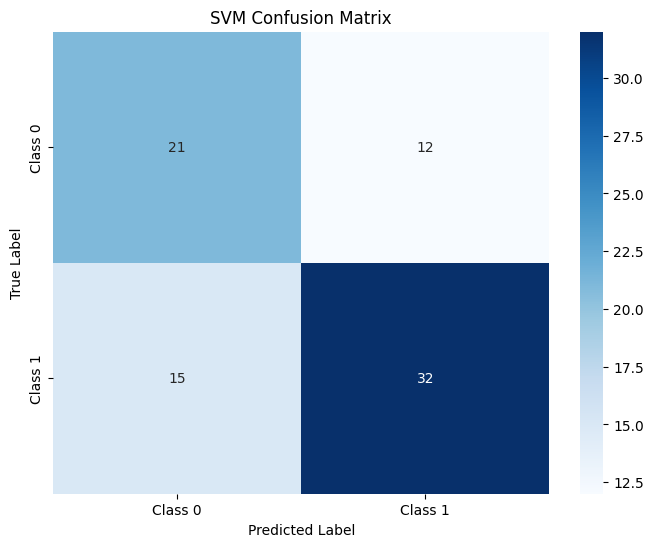

In [25]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Random undersampling
rus = RandomUnderSampler(random_state=1)
x_train_rus, y_train_rus = rus.fit_resample(x_train, y_train)

# Apply Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(x_train_rus, y_train_rus)

# Predict on test data
y_pred_dt = dt_model.predict(x_test)

# Evaluate Decision Tree
print("Decision Tree Classifier:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Generate confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plot_confusion_matrix(cm_dt, "Decision Tree Confusion Matrix")

# Apply Random Forest classifier
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(x_train_rus, y_train_rus)

# Predict on test data
y_pred_rf = rf_model.predict(x_test)

# Evaluate Random Forest
print("\nRandom Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Generate confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plot_confusion_matrix(cm_rf, "Random Forest Confusion Matrix")

# Apply Support Vector Machine (SVM) classifier
svm_model = SVC(random_state=1)
svm_model.fit(x_train_rus, y_train_rus)

# Predict on test data
y_pred_svm = svm_model.predict(x_test)

# Evaluate SVM
print("\nSupport Vector Machine Classifier:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

# Generate confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
plot_confusion_matrix(cm_svm, "SVM Confusion Matrix")


# heatmap

<Axes: >

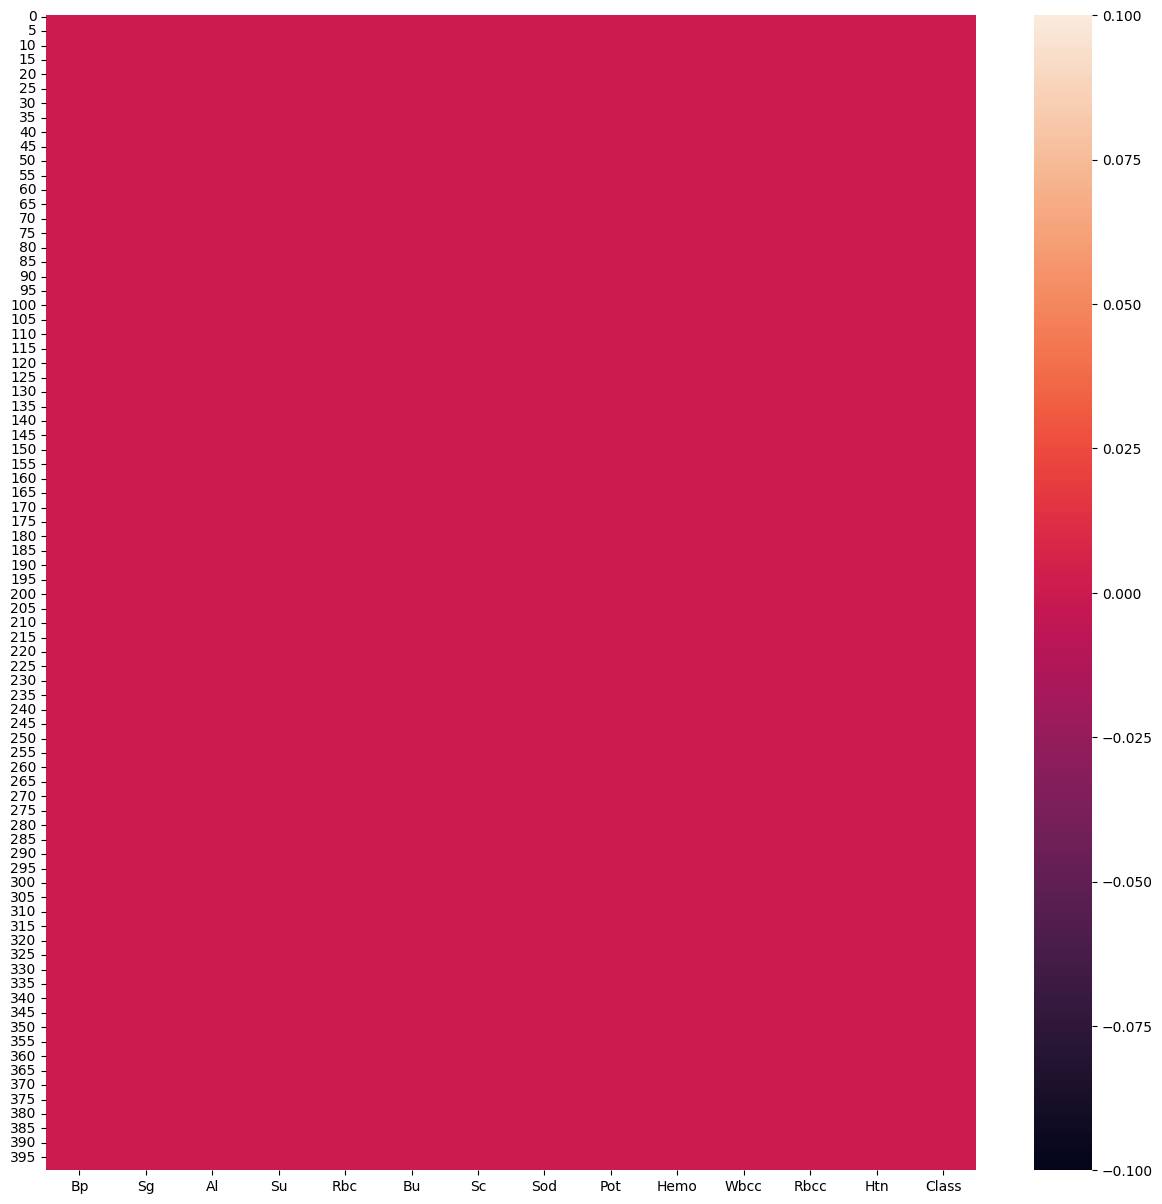

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())

# Null in cols

In [27]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var


Bp       0.0
Sg       0.0
Al       0.0
Su       0.0
Rbc      0.0
Bu       0.0
Sc       0.0
Sod      0.0
Pot      0.0
Hemo     0.0
Wbcc     0.0
Rbcc     0.0
Htn      0.0
Class    0.0
dtype: float64

In [29]:
drop_columns  = null_var[null_var >10].keys()
drop_columns

Index([], dtype='object')

# Row and col null sum

In [28]:
df.isnull().sum().sum()

0

# Dataframes: Value Ranges in each cols

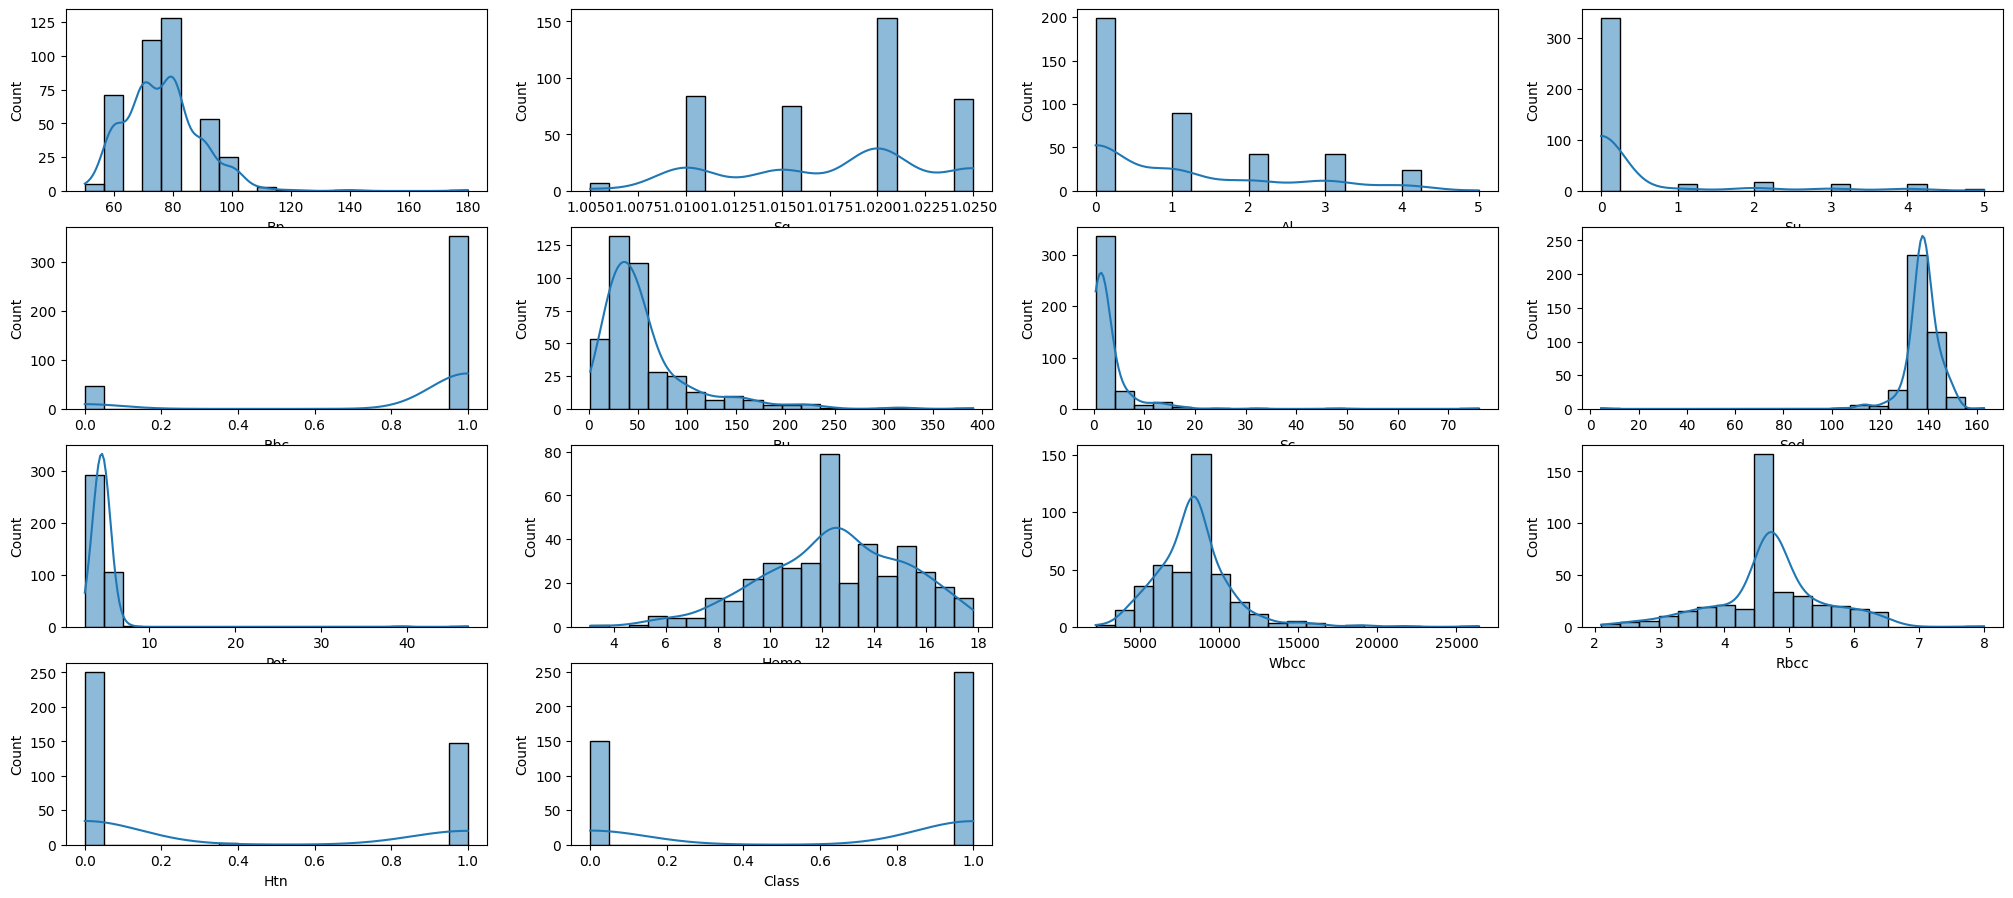

In [34]:
num_var=df.select_dtypes(include=['int64','float64']).columns

plt.figure(figsize=(25, 25))
for i, var in enumerate(num_var):
    plt.subplot(9, 4, i + 1)
    sns.histplot(df[var], bins=20, kde=True) 

# Scatter plot

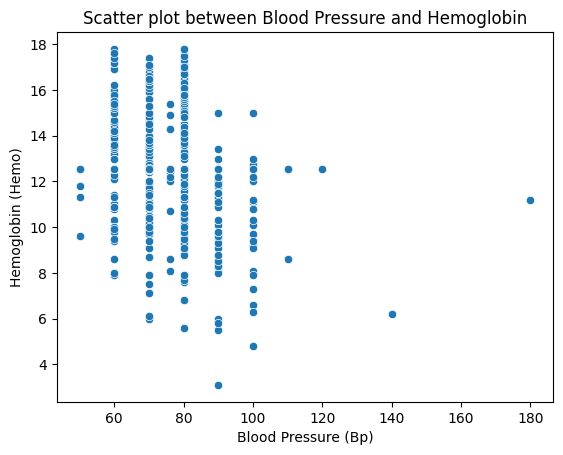

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot between Bp (Blood Pressure) and Hemo (Hemoglobin)
sns.scatterplot(x='Bp', y='Hemo', data=df)

# Adding title and labels
plt.title('Scatter plot between Blood Pressure and Hemoglobin')
plt.xlabel('Blood Pressure (Bp)')
plt.ylabel('Hemoglobin (Hemo)')

# Show the plot
plt.show()


# Hyper parameter

In [103]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values for tuning the Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV instance with the Random Forest model
grid_search = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(x_train, y_train)

# Step 4: Evaluate the best model found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(x_test)

# Calculate accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the best parameters and evaluation results
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.66
Confusion Matrix:
 [[ 6 22]
 [ 5 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.21      0.31        28
           1       0.68      0.90      0.78        52

    accuracy                           0.66        80
   macro avg       0.61      0.56      0.54        80
weighted avg       0.63      0.66      0.61        80



# ensemble

In [105]:
from sklearn.ensemble import VotingClassifier

# Create individual models
dt_model = DecisionTreeClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)
svm_model = SVC(probability=True, random_state=1)

# Combine the models in a voting classifier
ensemble_model = VotingClassifier(estimators=[
    ('decision_tree', dt_model),
    ('random_forest', rf_model),
    ('svm', svm_model)
], voting='soft')

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Predict on the test data
y_pred_ensemble = ensemble_model.predict(x_test)

# Evaluate the ensemble model
print("\nEnsemble Model (Voting Classifier):")
print(classification_report(y_test, y_pred_ensemble))
print("Accuracy:", accuracy_score(y_test, y_pred_ensemble))



Ensemble Model (Voting Classifier):
              precision    recall  f1-score   support

           0       0.35      0.32      0.33        28
           1       0.65      0.67      0.66        52

    accuracy                           0.55        80
   macro avg       0.50      0.50      0.50        80
weighted avg       0.54      0.55      0.55        80

Accuracy: 0.55


# Save model

In [123]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Save the trained model
joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']

# Import and test model

# Test1

In [110]:
df.head(1)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.02,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.2,1.0,1


In [121]:
# Now load the saved model and make predictions
model = joblib.load("random_forest_model.pkl")

# Example input with the correct number of features
input_data = [[80.0, 1.020, 1.0, 0.0, 1.0, 36.0, 1.2, 137.53, 4.63, 15.4, 7800.0, 5.20, 1.0]]  

# Predict using the loaded model
prediction = model.predict(input_data)[0]

print("Prediction:", prediction)


Prediction: 1


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Test2

In [111]:
df.tail(1)

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
399,80.0,1.025,0.0,0.0,1.0,18.0,1.1,141.0,3.5,15.8,6800.0,6.1,0.0,0


In [122]:
# Now load the saved model and make predictions
model = joblib.load("random_forest_model.pkl")

# Example input with the correct number of features
input_data = [[80.0,	1.025	,0.0	,0.0,	1.0,	18.0,	1.1	,141.0,	3.5,	15.8,	6800.0,	6.1,	0.0]]  

# Predict using the loaded model
prediction = model.predict(input_data)[0]

print("Prediction:", prediction)


Prediction: 0


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Test3 unseen data

In [125]:

# Now load the saved model and make predictions
model = joblib.load("random_forest_model.pkl")

# Example input with the correct number of features
input_data = [[83.13, 1.018, 2.18, 2.83, 0.47, 227.66, 13.47, 58.06, 27.45, 8.11, 4876.16, 5.94, 0.26]]  

# Predict using the loaded model
prediction = model.predict(input_data)[0]

print("Orignial:", 1)
print("Prediction:", prediction)


Orignial: 1
Prediction: 1


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Comparison 

In [4]:
import pandas as pd

# Create the accuracy data for different models and phases
accuracy_data = {
    'Phase': ['Default', 'After SMOTE', 'After Ensemble'],
    'Decision Tree': [95.0, 100.0, None],  # Ensemble not applicable to Decision Tree
    'Random Forest': [100.0, 100.0, None], # Ensemble not applicable to Random Forest
    'SVM': [58.75, 66.25, None],           # SVM not included in ensemble phase
    'Ensemble': [None, None, 55.0]          # Ensemble phase accuracy
}

accuracy_df = pd.DataFrame(accuracy_data)


styled_df = (accuracy_df.style
             .set_properties(**{
                 'background-color': '#f2f2f2',
                 'color': 'black',
                 'border-color': 'black',
                 'text-align': 'center'
             })
             .set_table_styles([
                 {'selector': 'thead th', 'props': [('background-color', '#4CAF50'), ('color', 'white'), ('text-align', 'center')]},
                 {'selector': 'th', 'props': [('text-align', 'center')]}
             ])
             .set_caption("Model Accuracy Comparison Across Phases")
             .format(precision=1))  

styled_df


,Phase,Decision Tree,Random Forest,SVM,Ensemble
0,Default,95.0,100.0,58.8,nan
1,After SMOTE,100.0,100.0,66.2,nan
2,After Ensemble,nan,nan,nan,55.0
